In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
import collections
import seaborn as sns
nltk.download('rslp')
from nltk.stem import RSLPStemmer

[nltk_data] Downloading package rslp to /home/vinicius/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [2]:
data = pd.read_csv('results.csv')

### Questão 1 - Estratégia de tokenização:

A estratégia de tokenização que decidi utilizar foi considerar apenas palavras de tamanho maior ou igual a 3 caractéres. Isso é bacana porque remove grande parte das palavras mais frequentes da e que geralmente são stopwords.

In [9]:
#limpa o texto e gera tokens
words = ''.join(str(v) for v in data.texto).lower()
tokens = RegexpTokenizer(r'[A-zÀ-ú\d]{3,}').tokenize(words)

### Questão 2:

In [8]:
docs_count = data.texto.count()
words_count = collections.Counter(tokens)
word_occurrences = sum(words_count.values())
rank = 1
ranks = []
words = []
freqs = []
probs = []
rprobs = []
for word,n in words_count.most_common():
    prob = (n/word_occurrences) * 100
    rprobs.append(rank * prob / 100)
    probs.append(prob)
    words.append(word)
    freqs.append(n)
    ranks.append(rank)
    rank += 1

table42 = pd.DataFrame()
table42['Word'] = words
table42['Freq'] = freqs
table42['r'] = ranks
table42['Pr(%)'] = probs
table42['r.Pr'] = rprobs
table42.head(50)

,Word,Freq,r,Pr(%),r.Pr
0,que,5158,1,4.206697,0.042067
1,para,1850,2,1.508800,0.030176
2,uma,1752,3,1.428874,0.042866
3,com,1734,4,1.414194,0.056568
4,não,1535,5,1.251896,0.062595
5,como,1080,6,0.880813,0.052849
6,por,1076,7,0.877551,0.061429
7,mais,940,8,0.766634,0.061331
8,dos,834,9,0.680183,0.061217
9,mas,731,10,0.596180,0.059618


### Questão 3:

In [21]:
rslp_stemmer = RSLPStemmer()

hash_map = {}
for t in tokens:
    rad = rslp_stemmer.stem(t)
    if rad not in hash_map.keys():
        hash_map[rad] = [t]
    else:
        if t not in hash_map[rad]:
            hash_map[rad].append(t)
hash_map

{'continu': ['continua',
  'continuar',
  'continuaremos',
  'continuidade',
  'continuou',
  'continuam',
  'continuamos',
  'continuem',
  'continuasse',
  'continuava',
  'continuaram',
  'continuamente',
  'continue',
  'continuarmos',
  'continuarei',
  'continuará',
  'continuação',
  'continuada',
  'continuarem',
  'continuaria'],
 'dand': ['dando'],
 'que': ['que', 'queira', 'queiram', 'queens'],
 'fal': ['falar',
  'fala',
  'falam',
  'falou',
  'falando',
  'falamos',
  'falava',
  'falavam',
  'falas',
  'falido',
  'falado',
  'falos',
  'fale',
  'falaram',
  'falência',
  'falo',
  'falará'],
 'atac': ['atacante',
  'ataca',
  'atacada',
  'atacar',
  'atacam',
  'atacou',
  'atacasse',
  'atacantes',
  'atacando'],
 'itali': ['italiano', 'italianos', 'italiana'],
 'marc': ['marcar',
  'marcou',
  'marcaram',
  'marcado',
  'marcados',
  'marcando',
  'marco',
  'marca',
  'marcação',
  'marcos',
  'marcia',
  'marcas',
  'marcava',
  'marcada',
  'marcantes',
  'marcam

#### Falsos Positivos

'dur': ['durante','duro']
'ele': ['ele', 'eleição']
'tem': ['tem', 'teme']
 'di': ['diante', 'diariamente', 'diaria']
'qu': ['quando', 'quem', 'quer', 'queríamos', 'quai']
'gest': ['gesto','gestação']
'cert': ['certas', 'certidão']
'cor': ['cores', 'coro']
'pi': ['pior', 'piada']
'import': [ 'importância','importação']

Esses falsos positivos fazem com que o motor de busca retorne resultados que não correspondem ao que o usuário estava buscando.

#### Falsos negativos

diz: ['diz','dizer','dizem'],
diss: ['disse', 'disso', 'disseram', 'dissessem']

tecnolog: ['tecnologia', 'tecnologias']
tecnológ: ['tecnológicos', 'tecnológico', 'tecnológica', 'tecnológicas']

telefon: ['telefone', 'telefonia', 'telefonam', 'telefones']
telefonem: ['telefonema', 'telefonemas']

terc: ['terceira', 'terceiro', 'terceiros']
terceir: ['terceirizado', 'terceirizada', 'terceirização']

tol: ['toleram']
toler: ['tolerantes', 'tolerância', 'tolerante', 'tolerada', 'tolerar']

tort: ['tortura', 'tortas', 'torturas', 'tortuosa']
tortur: ['torturado', 'torturadores', 'torturaram']

total: ['total', 'totalmente', 'totalidade']
totalit: ['totalitários', 'totalitário']

trad: ['tradição', 'tradições']
tradic: ['tradicionais', 'tradicional', 'tradicionalmente']

tranquil: ['tranquilo', 'tranquilidade', 'tranquila', 'tranquilas']
tranquiliz: ['tranquiliza', 'tranquilizava']

tribut: ['tributos', 'tributação']
tributár: ['tributárias', 'tributária']

### Questão 4:

In [24]:
pr_prob = table42['Pr(%)'] / 100
c = np.median(table42['r.Pr'])
table42['c'] = c / pr_prob
message = "the best c parameter is %f" % c
message

'the best c parameter is 0.138524'

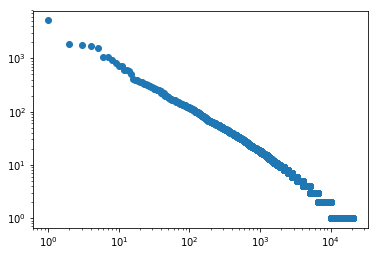

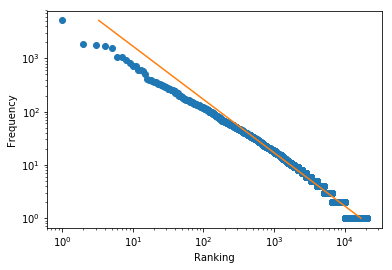

In [26]:
f, ax = plt.subplots()
ax.set(xscale="log", yscale="log")
plt.plot(table42['r'], table42['Freq'], linestyle='None', marker='o')
plt.plot(table42['c'], table42['Freq'], linestyle='-', marker='None')
plt.xlabel('Ranking')
plt.ylabel('Frequency')
plt.show()